In [1]:
#librerías
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import seaborn as sbn
from datetime import datetime as dt
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:75% }</style>"))

In [2]:
#Lectura de todo el directorio

dense = [pd.read_pickle(filename) for filename in glob('D:/Tesis/data_test/full-pickle/*.pkl')]

In [3]:
#Lectura de la data compacta

df = pd.read_pickle('D:\\Tesis\\data_test\\merged\\output.pkl')

# Este df solo contempla a los pesos iniciales menores a 3.5

In [4]:
#Lectura de la data compacta tuneada sin valores corruptos

t_df = pd.read_pickle('D:\\Tesis\\data_test\\merged\\tuned-output.pkl')

# Este df solo contempla a los pesos iniciales menores a 3.5

In [5]:
df.dtypes

Semana                                int64
Fecha                        datetime64[ns]
Peso                                float64
Incremento                          float64
Ratio                               float64
Factor_de_conversion_acum           float64
Total_alimento_[USD]                float64
T_min                                object
T_MAX                                object
O2_min                               object
O2_MAX                               object
dtype: object

In [6]:
df.iloc[0]

Semana                                                             1
Fecha                                            2013-03-04 00:00:00
Peso                                                            3.38
Incremento                                                       NaN
Ratio                                                            NaN
Factor_de_conversion_acum                                    0.57675
Total_alimento_[USD]                                             NaN
T_min                        [nan, nan, nan, 30.6, 30.6, 30.0, 29.1]
T_MAX                        [nan, nan, nan, 32.1, 31.0, 32.0, 31.3]
O2_min                           [nan, nan, nan, 5.9, 5.4, 5.2, 4.3]
O2_MAX                           [nan, nan, nan, 7.4, 6.8, 6.7, 8.8]
Name: 0, dtype: object

In [8]:
def custom_mean(register):
    return np.nanmean(register)

In [11]:
cols_to_parse = ['T_min', 'T_MAX', 'O2_min', 'O2_MAX']

for col_name in cols_to_parse:    
    new_name = col_name + '_media'
    df[new_name] = df[col_name].apply(custom_mean)
df

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


,Semana,Fecha,Peso,Incremento,Ratio,Factor_de_conversion_acum,Total_alimento_[USD],T_min,T_MAX,O2_min,O2_MAX,T_min_media,T_MAX_media,O2_min_media,O2_MAX_media
0,1,2013-03-04,3.38,NaN,NaN,0.576750,NaN,"[nan, nan, nan, 30.6, 30.6, 30.0, 29.1]","[nan, nan, nan, 32.1, 31.0, 32.0, 31.3]","[nan, nan, nan, 5.9, 5.4, 5.2, 4.3]","[nan, nan, nan, 7.4, 6.8, 6.7, 8.8]",30.075000,31.600000,5.200000,7.425000
1,2,2013-03-11,4.92,1.54,1.4556,0.732102,NaN,"[29.3, 30.5, 30.8, 31.1, 31.2, 30.9, 29.3]","[31.2, 30.6, 32.1, 31.9, 30.5, 32.4, 31.3]","[4.6, 4.6, 3.9, 4.4, 5.3, 5.0, 4.9]","[6.1, 7.6, 6.1, 6.5, 6.4, 7.2, 6.0]",30.442857,31.428571,4.671429,6.557143
2,3,2013-03-18,7.03,2.11,1.4289,0.817244,NaN,"[30.6, 30.5, 30.2, 30.8, 31.0, 30.3, 29.8]","[31.3, 31.1, 31.7, 31.2, 31.1, 31.0, 30.0]","[5.8, 5.1, 7.9, 6.5, 5.6, 4.5, 3.7]","[6.8, 7.0, 7.8, 7.7, 7.2, 6.8, 6.5]",30.457143,31.057143,5.585714,7.114286
3,4,2013-03-25,8.83,1.80,1.2560,0.889875,NaN,"[27.5, 28.9, 29.8, 29.8, 29.2, 28.6, 28.3]","[30.0, 30.8, 30.9, 30.2, 29.7, 28.9, 29.9]","[3.7, 5.0, 5.7, 5.3, 5.6, 5.2, 5.9]","[6.7, 8.6, 8.4, 8.0, 7.7, 7.7, 9.8]",28.871429,30.057143,5.200000,8.128571
4,5,2013-04-01,10.29,1.46,1.1653,1.018967,NaN,"[28.4, 28.6, 28.5, 26.7, 27.3, 27.9, 28.2]","[31.2, 30.4, 29.7, 28.4, 28.7, 28.7, 29.9]","[5.4, 6.0, 5.6, 4.1, 6.4, 7.0, 7.1]","[8.5, 8.6, 7.1, 8.2, 9.6, 8.0, 11.0]",27.942857,29.571429,5.942857,8.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21140,15,2015-01-19,18.06,1.24,1.0737,1.365180,9601.393075,"[26.1, 26.4, 26.6, 26.4, 26.8, 26.2, 26.7]","[27.7, 27.3, 27.7, 27.9, 27.6, 27.5, 27.0]","[4.8, 5.5, 5.0, 4.9, 4.9, 4.5, 4.4]","[9.9, 9.1, 7.5, 9.1, 8.0, 8.2, 7.5]",26.457143,27.528571,4.857143,8.471429
21141,16,2015-01-26,19.64,1.58,1.0875,1.420388,10818.724258,"[26.1, 26.0, 25.3, 25.9, 25.5, 25.8, 25.7]","[27.8, 26.8, 26.8, 26.7, 27.7, 27.0, 27.0]","[4.3, 4.9, 5.6, 5.6, 5.4, 5.3, 5.8]","[9.0, 11.4, 10.2, 10.0, 10.0, 9.7, 9.5]",25.757143,27.114286,5.271429,9.971429
21142,17,2015-02-02,20.72,1.08,1.0550,1.524847,12223.042902,"[26.4, 26.5, 25.8, 25.7, 26.4, 26.5, 26.3]","[27.6, 27.7, 27.0, 27.0, 27.6, 27.4, 27.3]","[5.3, 4.6, 5.3, 5.8, 5.3, 4.6, 4.9]","[6.6, 10.0, 9.7, 9.5, 7.8, 10.3, 10.3]",26.228571,27.371429,5.114286,9.171429
21143,18,2015-02-09,22.28,1.56,1.0753,1.572108,13526.105952,"[26.1, 26.2, 27.0, 27.5, 27.3, 27.2, 26.6]","[27.6, 28.1, 28.8, 28.6, 28.5, 28.2, 28.5]","[4.6, 3.6, 4.5, 4.2, 4.1, 3.9, 4.1]","[9.1, 9.9, 10.8, 8.2, 7.2, 7.9, 7.9]",26.842857,28.328571,4.142857,8.714286


In [12]:
cols_to_parse = ['T_min', 'T_MAX', 'O2_min', 'O2_MAX']

for col_name in cols_to_parse:    
    new_name = col_name + '_media'
    t_df[new_name] = t_df[col_name].apply(custom_mean)
t_df

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


,Semana,Fecha,Peso,Incremento,Ratio,Factor_de_conversion_acum,Total_alimento_[USD],T_min,T_MAX,O2_min,O2_MAX,T_min_media,T_MAX_media,O2_min_media,O2_MAX_media
0,1,2013-03-04,3.38,NaN,NaN,0.576750,NaN,"[nan, nan, nan, 30.6, 30.6, 30.0, 29.1]","[nan, nan, nan, 32.1, 31.0, 32.0, 31.3]","[nan, nan, nan, 5.9, 5.4, 5.2, 4.3]","[nan, nan, nan, 7.4, 6.8, 6.7, 8.8]",30.075000,31.600000,5.200000,7.425000
1,2,2013-03-11,4.92,1.54,1.4556,0.732102,NaN,"[29.3, 30.5, 30.8, 31.1, 31.2, 30.9, 29.3]","[31.2, 30.6, 32.1, 31.9, 30.5, 32.4, 31.3]","[4.6, 4.6, 3.9, 4.4, 5.3, 5.0, 4.9]","[6.1, 7.6, 6.1, 6.5, 6.4, 7.2, 6.0]",30.442857,31.428571,4.671429,6.557143
2,3,2013-03-18,7.03,2.11,1.4289,0.817244,NaN,"[30.6, 30.5, 30.2, 30.8, 31.0, 30.3, 29.8]","[31.3, 31.1, 31.7, 31.2, 31.1, 31.0, 30.0]","[5.8, 5.1, 7.9, 6.5, 5.6, 4.5, 3.7]","[6.8, 7.0, 7.8, 7.7, 7.2, 6.8, 6.5]",30.457143,31.057143,5.585714,7.114286
3,4,2013-03-25,8.83,1.80,1.2560,0.889875,NaN,"[27.5, 28.9, 29.8, 29.8, 29.2, 28.6, 28.3]","[30.0, 30.8, 30.9, 30.2, 29.7, 28.9, 29.9]","[3.7, 5.0, 5.7, 5.3, 5.6, 5.2, 5.9]","[6.7, 8.6, 8.4, 8.0, 7.7, 7.7, 9.8]",28.871429,30.057143,5.200000,8.128571
4,5,2013-04-01,10.29,1.46,1.1653,1.018967,NaN,"[28.4, 28.6, 28.5, 26.7, 27.3, 27.9, 28.2]","[31.2, 30.4, 29.7, 28.4, 28.7, 28.7, 29.9]","[5.4, 6.0, 5.6, 4.1, 6.4, 7.0, 7.1]","[8.5, 8.6, 7.1, 8.2, 9.6, 8.0, 11.0]",27.942857,29.571429,5.942857,8.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21140,15,2015-01-19,18.06,1.24,1.0737,1.365180,9601.393075,"[26.1, 26.4, 26.6, 26.4, 26.8, 26.2, 26.7]","[27.7, 27.3, 27.7, 27.9, 27.6, 27.5, 27.0]","[4.8, 5.5, 5.0, 4.9, 4.9, 4.5, 4.4]","[9.9, 9.1, 7.5, 9.1, 8.0, 8.2, 7.5]",26.457143,27.528571,4.857143,8.471429
21141,16,2015-01-26,19.64,1.58,1.0875,1.420388,10818.724258,"[26.1, 26.0, 25.3, 25.9, 25.5, 25.8, 25.7]","[27.8, 26.8, 26.8, 26.7, 27.7, 27.0, 27.0]","[4.3, 4.9, 5.6, 5.6, 5.4, 5.3, 5.8]","[9.0, 11.4, 10.2, 10.0, 10.0, 9.7, 9.5]",25.757143,27.114286,5.271429,9.971429
21142,17,2015-02-02,20.72,1.08,1.0550,1.524847,12223.042902,"[26.4, 26.5, 25.8, 25.7, 26.4, 26.5, 26.3]","[27.6, 27.7, 27.0, 27.0, 27.6, 27.4, 27.3]","[5.3, 4.6, 5.3, 5.8, 5.3, 4.6, 4.9]","[6.6, 10.0, 9.7, 9.5, 7.8, 10.3, 10.3]",26.228571,27.371429,5.114286,9.171429
21143,18,2015-02-09,22.28,1.56,1.0753,1.572108,13526.105952,"[26.1, 26.2, 27.0, 27.5, 27.3, 27.2, 26.6]","[27.6, 28.1, 28.8, 28.6, 28.5, 28.2, 28.5]","[4.6, 3.6, 4.5, 4.2, 4.1, 3.9, 4.1]","[9.1, 9.9, 10.8, 8.2, 7.2, 7.9, 7.9]",26.842857,28.328571,4.142857,8.714286


# <a id='instancias'> 1. Plotting variables</a>

### Dropping nan values

In [8]:
T_min = np.hstack(df['T_min'].values)

T_min = T_min[~np.isnan(T_min)]

In [12]:
T_max = np.hstack(df['T_MAX'].values)

T_max = T_max[~np.isnan(T_max)]

In [101]:
O2_min = np.hstack(df['O2_min'].values)

O2_min = O2_min[~np.isnan(O2_min)]

In [102]:
O2_max = np.hstack(df['O2_MAX'].values)

O2_max = O2_max[~np.isnan(O2_max)]

-------------

In [9]:
T_min_2 = np.hstack(t_df['T_min'].values)

T_min_2 = T_min_2[~np.isnan(T_min_2)]

In [13]:
T_max_2 = np.hstack(t_df['T_MAX'].values)

T_max_2 = T_max_2[~np.isnan(T_max_2)]

In [105]:
O2_min_2 = np.hstack(t_df['O2_min'].values)

O2_min_2 = O2_min_2[~np.isnan(O2_min_2)]

In [121]:
O2_max_2 = np.hstack(t_df['O2_MAX'].values)

O2_max_2 = O2_max_2[~np.isnan(O2_max_2)]

## <a id='boxplot'> 1.1 Boxplot</a>

In [6]:
def custom_boxplot(dfs, col):
    sbn.set_theme(style="whitegrid")        
    fig, ejes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle(col, fontsize=16)
    it = 0
    
    for df in dfs:
        if it != 1:
            title = 'Antes'
        else:
            title = 'Despues'
            
        sbn.boxplot(x = df, ax = ejes[it]).set_title(title, fontsize=14)
        it += 1
        
    plt.show()

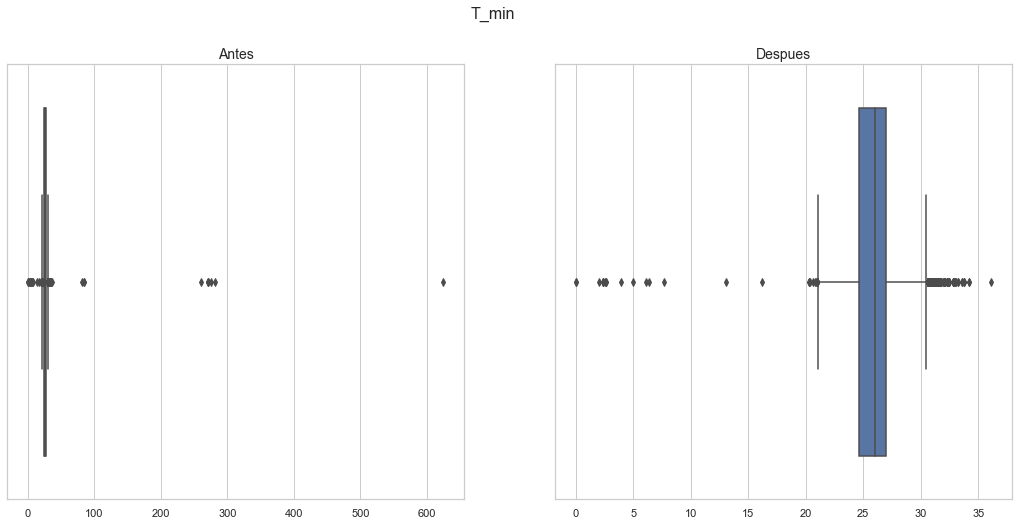

In [10]:
T_mn = [T_min, T_min_2]

custom_boxplot(T_mn,'T_min')

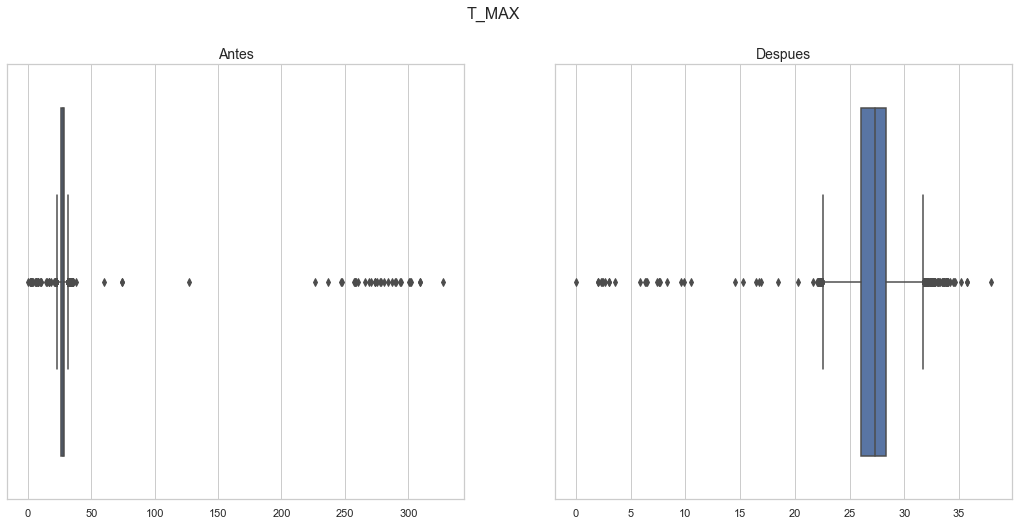

In [14]:
T_mx = [T_max, T_max_2]

custom_boxplot(T_mx,'T_MAX')

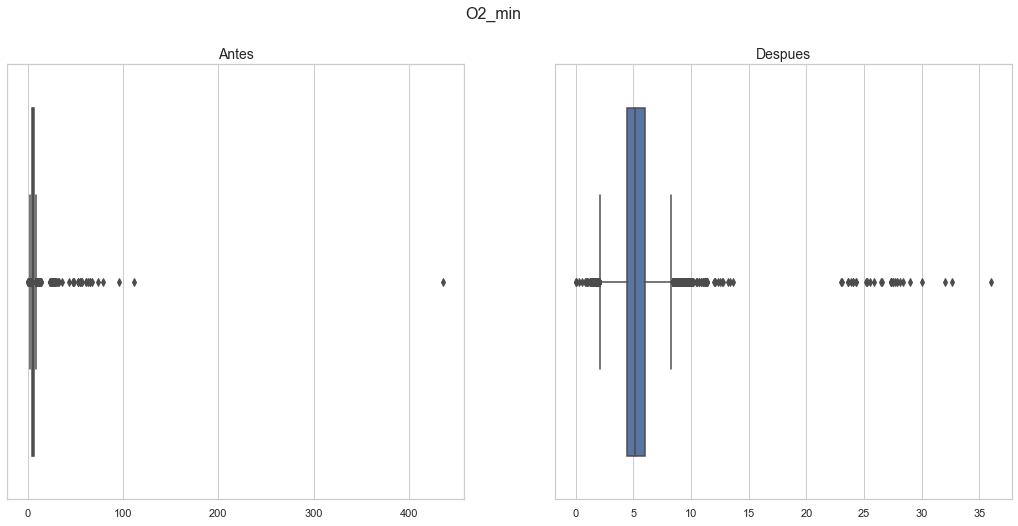

In [118]:
O2_mn = [O2_min, O2_min_2]

custom_boxplot(O2_mn,'O2_min')

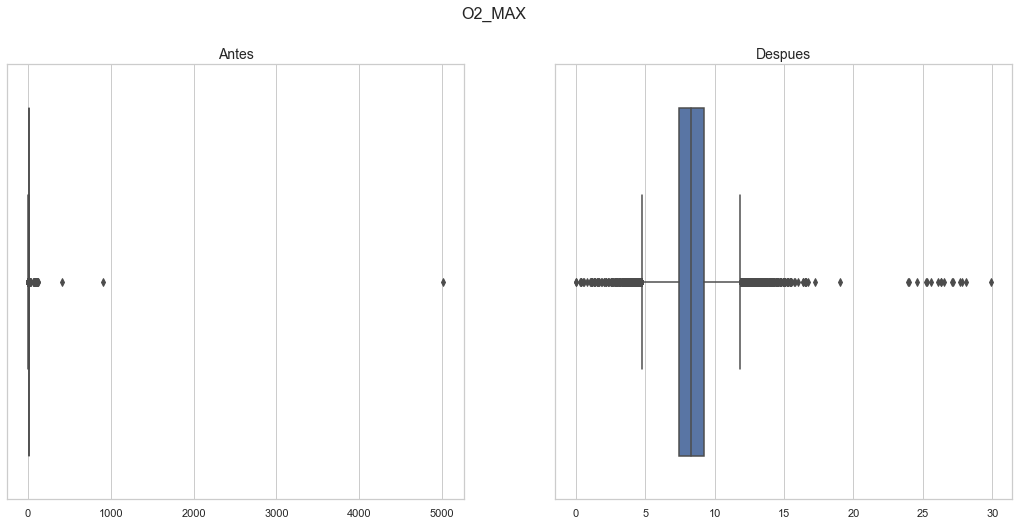

In [122]:
O2_mx = [O2_max, O2_max_2]

custom_boxplot(O2_mx,'O2_MAX')

---

- Clearly, it's pretty obvious that the tuned data makes more sense about de min and max limits since the corrupts values

## <a id='cumulative'> 1.2 Cumulative</a>

In [15]:
def custom_cumulative(dfs, col):
    sbn.set_theme(style="whitegrid")        
    fig, ejes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle(col, fontsize=16)
    it = 0
    
    for df in dfs:
        if it != 1:
            title = 'Antes'
        else:
            title = 'Despues'
        
        sbn.histplot(x = df, cumulative = True, stat = 'density', ax = ejes[it]).set_title(title, fontsize=14)
        
        plt.xticks(range(0, int(df.max()) + 1, 2))
        
        it += 1
        
    plt.show()

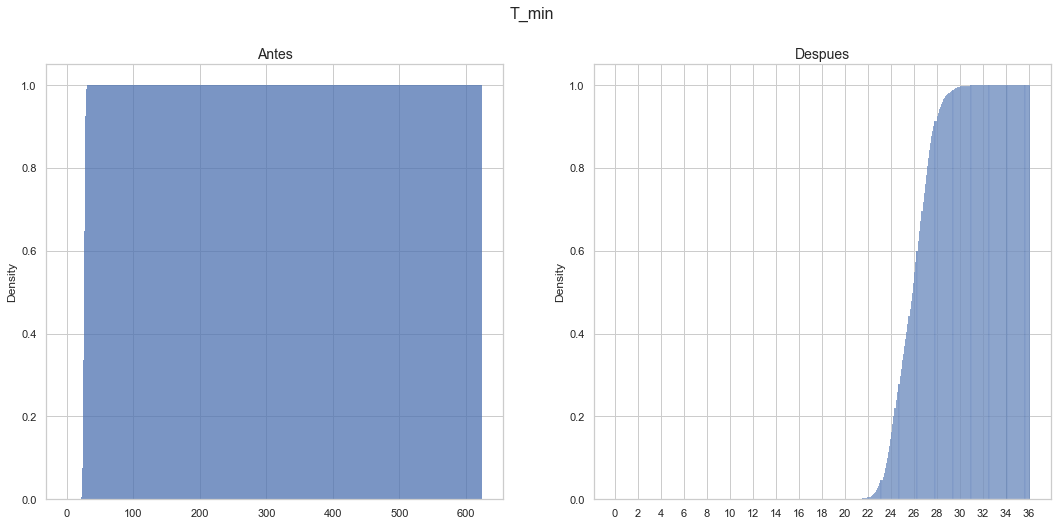

In [138]:
custom_cumulative(T_mn, 'T_min')

---

- Here, we can say that **T_min** to 21 and 30 degrees 

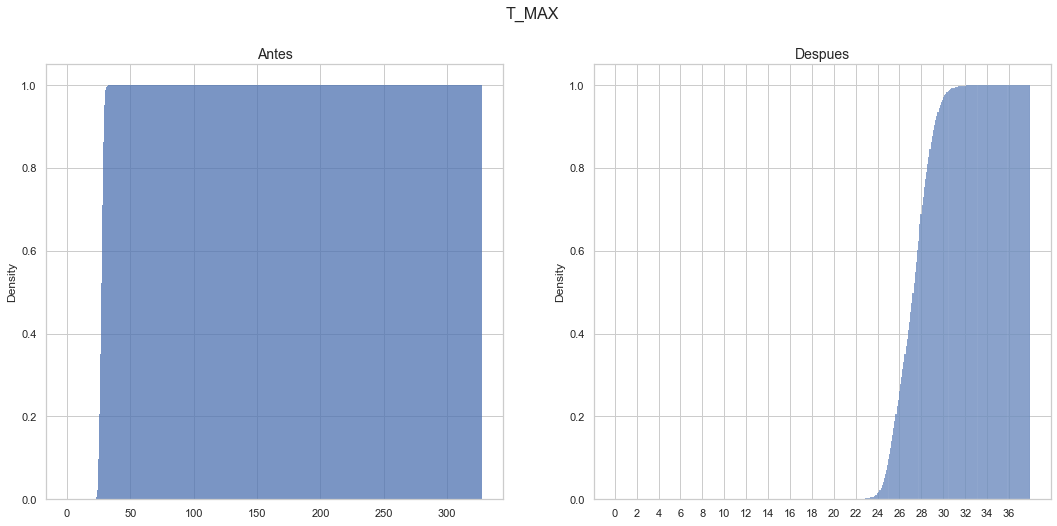

In [16]:
custom_cumulative(T_mx, 'T_MAX')

---

- Here, we can say that **T_MAX** to 23 and 32 degrees 

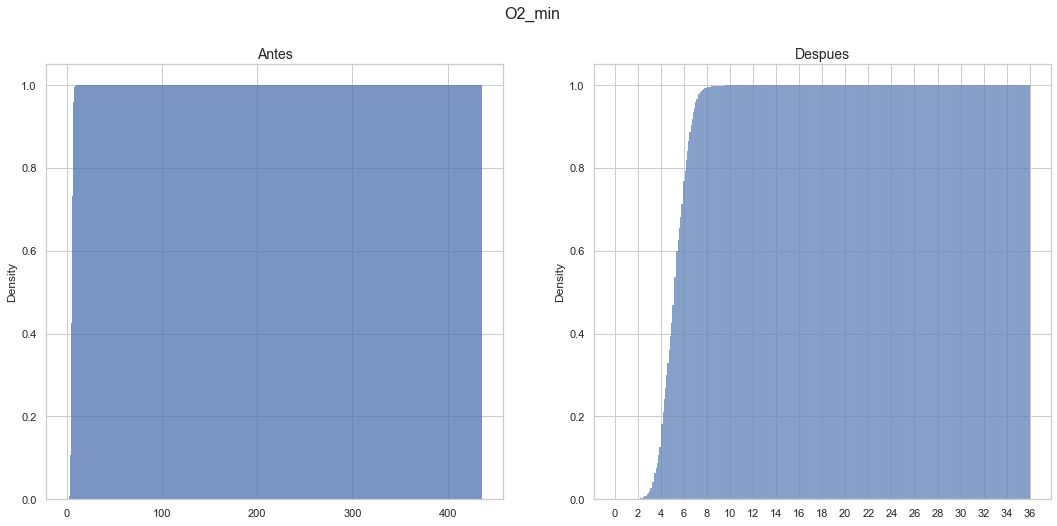

In [140]:
custom_cumulative(O2_mn, 'O2_min')

---

- Here, we can say that **O2_min** to 2 and 9 points 

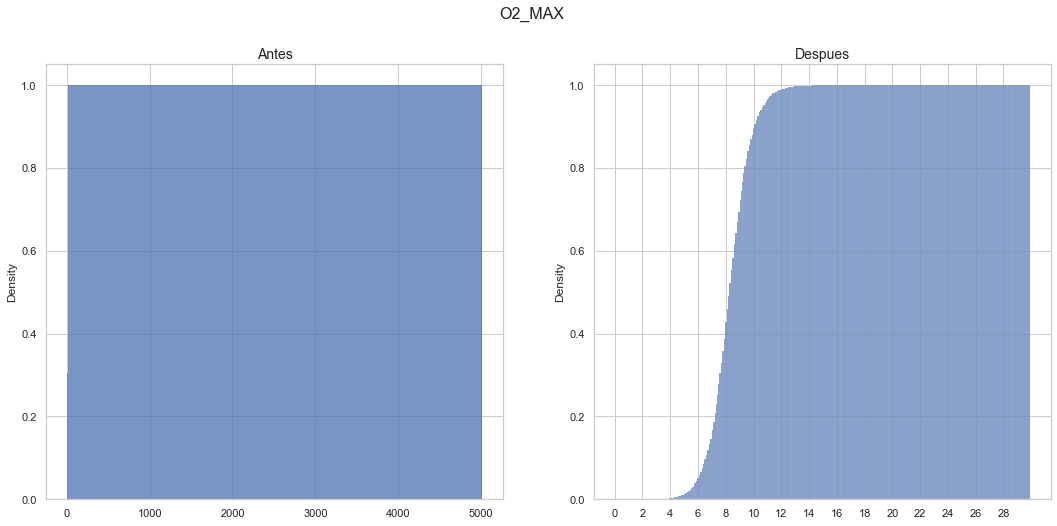

In [141]:
custom_cumulative(O2_mx, 'O2_MAX')

---

- Here, we can say that **O2_MAX** to 4 and 12 points

## Plotting avg weight vs week

In [80]:
def plot_avg_w_vs(col_name, n_week):
    title = 'Semana ' + str(n_week)
    x_label = col_name
    y_label = 'Peso'
    
    font = {'size' : 14}

    plt.rc('font', **font)

    plt.figure(figsize=(12, 8))

    plt.scatter(df[col_name][df['Semana'] == n_week], df['Peso'][df['Semana'] == n_week])
    
    plt.title(title)

    plt.xlabel(x_label)

    plt.ylabel(y_label)

    plt.show()

## T_min_media

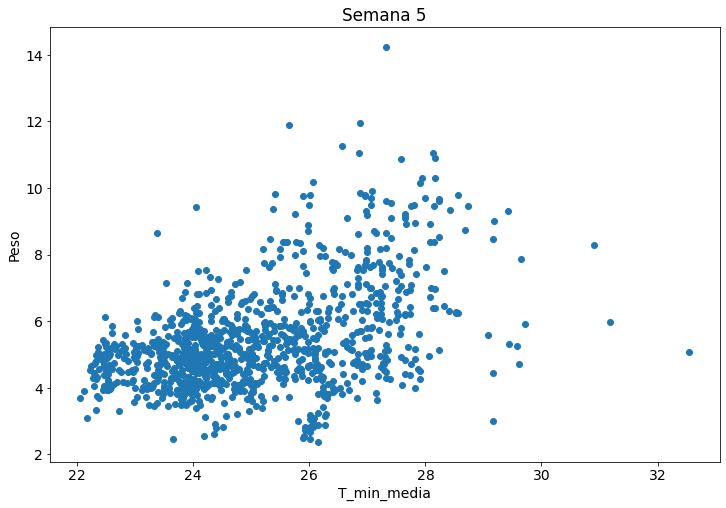

In [51]:
plot_avg_w_vs('T_min_media', 5)

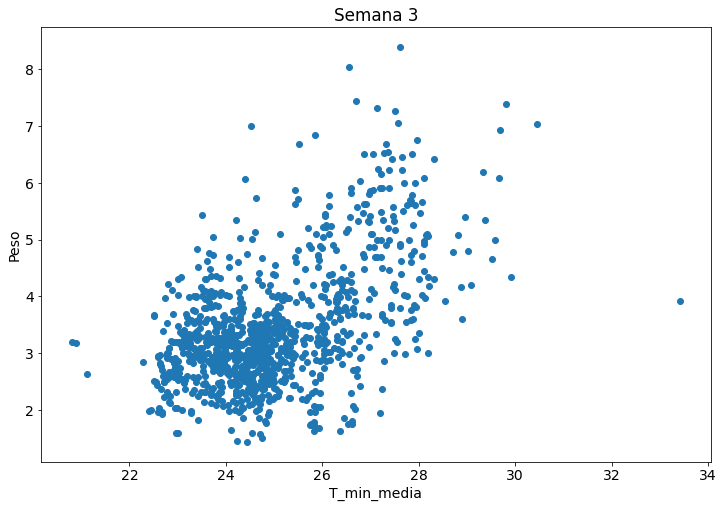

In [52]:
plot_avg_w_vs('T_min_media', 3)

## T_MAX_media

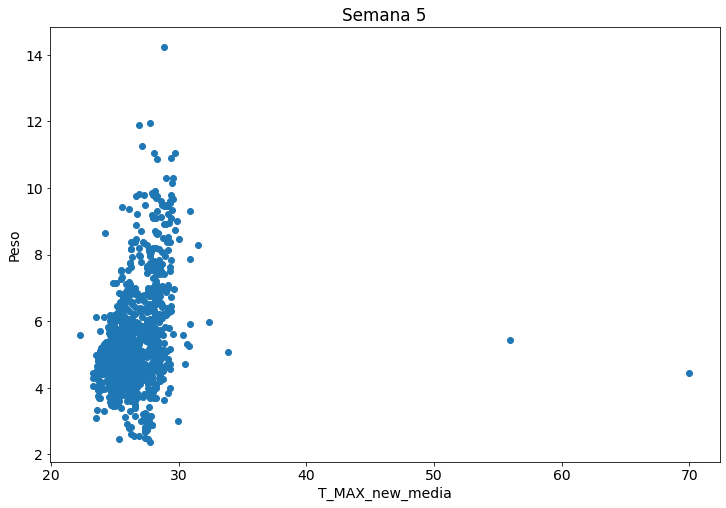

In [14]:
plot_avg_w_vs('T_MAX_new_media', 5)

## Without outlayers

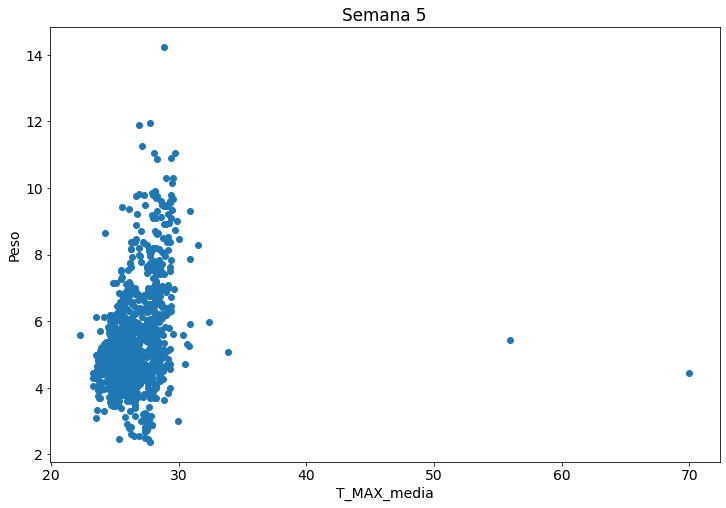

In [81]:
plot_avg_w_vs('T_MAX_media', 5)

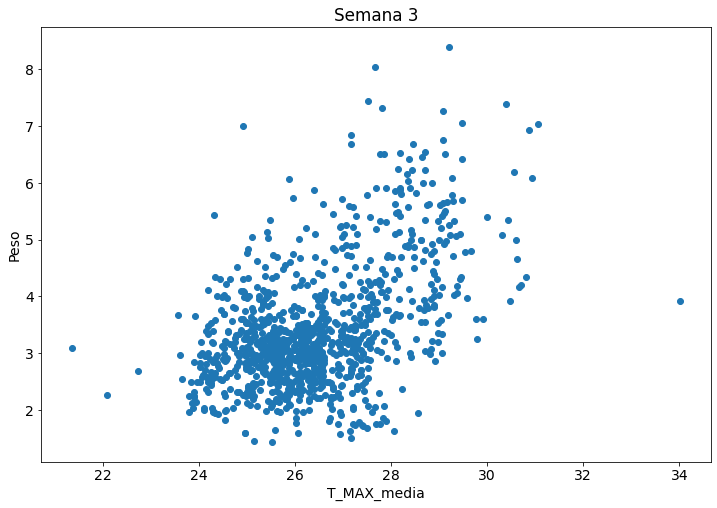

In [54]:
plot_avg_w_vs('T_MAX_media', 3)

## O2_min_media

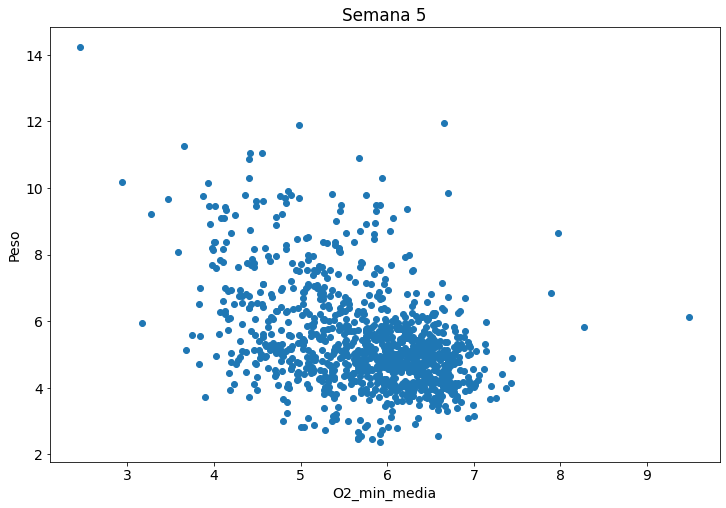

In [55]:
plot_avg_w_vs('O2_min_media', 5)

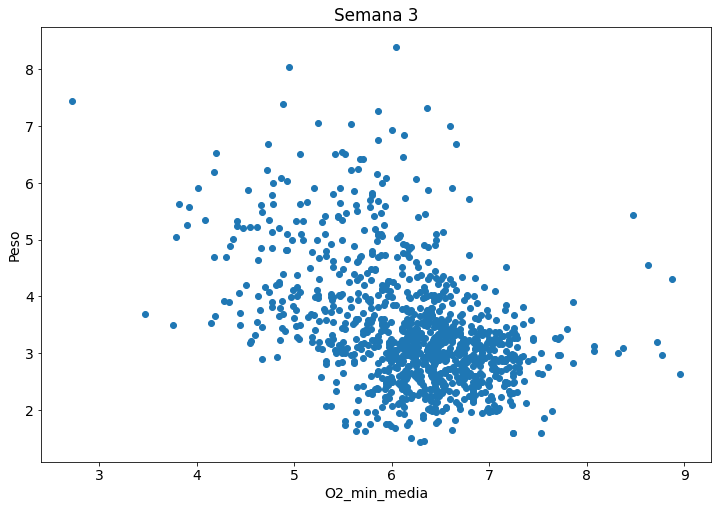

In [56]:
plot_avg_w_vs('O2_min_media', 3)

## O2_MAX_media

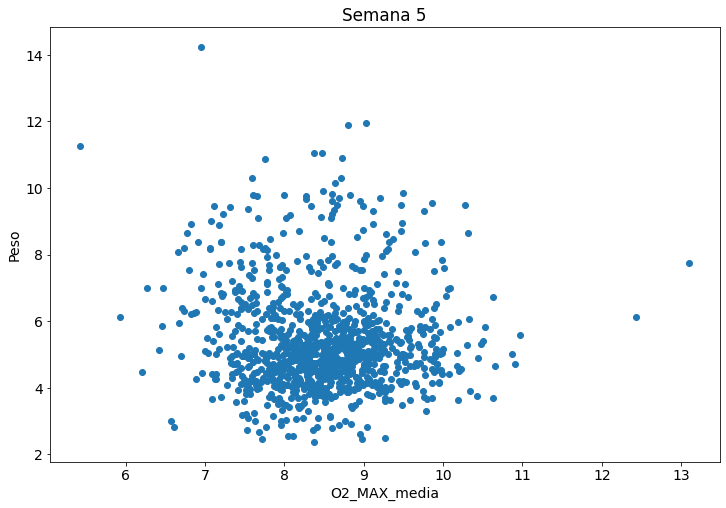

In [57]:
plot_avg_w_vs('O2_MAX_media', 5)

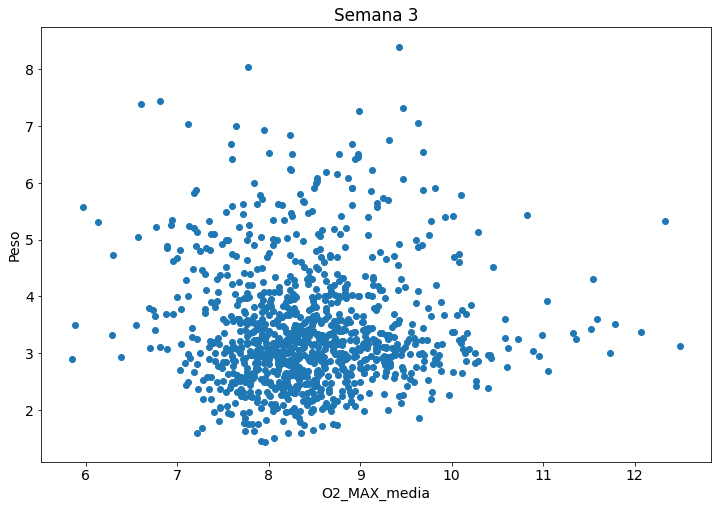

In [58]:
plot_avg_w_vs('O2_MAX_media', 3)

In [66]:
for value in np.isnan(df['T_min_media'][df['Semana'] == 5]):
    if value == True:
        print(value)

True
True
True
True
True
True
True
True


In [105]:
df['T_min_media'][df['Semana'] == 5].dropna().values

array([27.94285714, 24.48571429, 24.1       , ..., 24.97142857,
       23.78571429, 24.2       ])

In [106]:
df['T_min_media'][df['Semana'] == 5].dropna().index

Int64Index([    4,    14,    36,    58,    80,   105,   127,   150,   172,
              194,
            ...
            20928, 20948, 20967, 20987, 21009, 21034, 21059, 21083, 21107,
            21130],
           dtype='int64', length=1081)

In [107]:
idy = df['T_min_media'][df['Semana'] == 5].dropna().index

df['Peso'][idx].values

array([10.29 ,  5.658,  4.701, ...,  6.666,  3.661,  4.347])

In [114]:
x = df['T_min_media'][df['Semana'] == 5].dropna().values

y = df['Peso'][idy].values

z = np.polyfit(x, y, 10)

z

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([ 7.55740537e-08, -1.84356013e-05,  1.87793600e-03, -1.00641174e-01,
        2.74109111e+00, -1.20702860e+01, -1.69076605e+03,  5.96040912e+04,
       -9.71317182e+05,  8.17766085e+06, -2.87309054e+07])

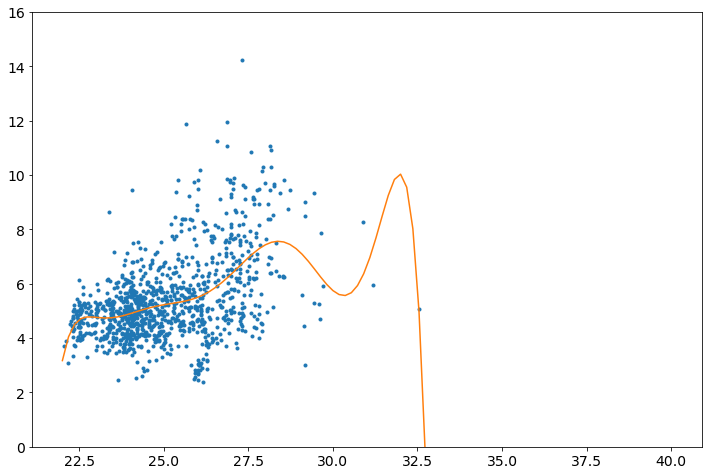

In [116]:
p = np.poly1d(z)

xp = np.linspace(22, 40, 100)

plt.figure(figsize=(12, 8))

plt.plot(x, y, '.', xp, p(xp), '-')

plt.ylim(0, 16)

plt.show()